In [92]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
from documents.load_data import *
from Model.Shallow_CNN import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
train_loader, test_loader, val_loader, _ = loader()(subject ='ALL',
                                             batch_size= 30,
                                             num_validation =37)

Train data shape:  (2078, 22, 1000)
Train labels shape:  (2078,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)


In [4]:
criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    

def test(test_loader=test_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = Variable(data), Variable(target).long()
            output = model(data)
            test_loss += criteria(output, target, reduction='sum').item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().cpu().sum().item()
        
    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [22]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9, last_epoch=-1)
    epoches = range(epoches)
    for epoch in epoches:
        scheduler.step()
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))

    print('Test set result:')
    test(test_loader, mode = 'val')

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')
    plt.show()

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.400468
Train Epoch: 0 [120/199 (83%)]	Loss: 1.363552
train loss: 1.3804, Accuracy: 57/199 (29%)
validation loss: 1.3807, Accuracy: 11/38 (29%)

Train Epoch: 1 [0/199 (0%)]	Loss: 1.213649
Train Epoch: 1 [120/199 (83%)]	Loss: 1.106686
train loss: 1.3942, Accuracy: 50/199 (25%)
validation loss: 1.4040, Accuracy: 9/38 (24%)

Train Epoch: 2 [0/199 (0%)]	Loss: 0.950643
Train Epoch: 2 [120/199 (83%)]	Loss: 0.886443
train loss: 1.6480, Accuracy: 50/199 (25%)
validation loss: 1.6959, Accuracy: 9/38 (24%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.794154
Train Epoch: 3 [120/199 (83%)]	Loss: 0.638600
train loss: 2.1932, Accuracy: 50/199 (25%)
validation loss: 2.3492, Accuracy: 9/38 (24%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.554641
Train Epoch: 4 [120/199 (83%)]	Loss: 0.549945
t

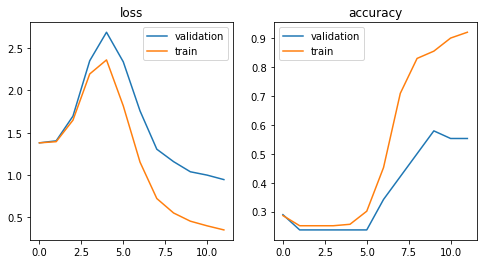

In [31]:
train_loader, test_loader, val_loader,_ = loader()(subject= 1,
                                             batch_size= 35,
                                             num_validation =38)
model = CNN_Shallow()


optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.013)
main_train(epoches = 12)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.385101
Train Epoch: 0 [150/198 (71%)]	Loss: 1.370009
train loss: 1.3375, Accuracy: 105/198 (53%)
validation loss: 1.3596, Accuracy: 17/38 (45%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.112344
Train Epoch: 1 [150/198 (71%)]	Loss: 1.285601
train loss: 1.2120, Accuracy: 110/198 (56%)
validation loss: 1.3059, Accuracy: 16/38 (42%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.011127
Train Epoch: 2 [150/198 (71%)]	Loss: 1.056553
train loss: 1.1154, Accuracy: 127/198 (64%)
validation loss: 1.2795, Accuracy: 11/38 (29%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.760726
Train Epoch: 3 [150/198 (71%)]	Loss: 0.845365
train loss: 0.9613, Accuracy: 152/198 (77%)
validation loss: 1.2304, Accuracy: 16/38 (42%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.796491
Train Epoch: 4 [150/198 (71%)]	Loss: 0.8

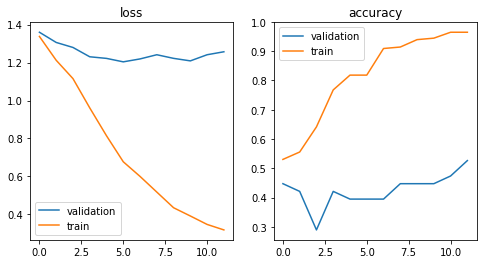

In [18]:
train_loader, test_loader, val_loader,_ = loader()(subject= 2,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 12)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.382706
Train Epoch: 0 [150/198 (71%)]	Loss: 1.378699
train loss: 1.3766, Accuracy: 61/198 (31%)
validation loss: 1.3846, Accuracy: 11/38 (29%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.209404
Train Epoch: 1 [150/198 (71%)]	Loss: 1.150063
train loss: 1.3060, Accuracy: 98/198 (49%)
validation loss: 1.3555, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.060613
Train Epoch: 2 [150/198 (71%)]	Loss: 0.844458
train loss: 1.1412, Accuracy: 128/198 (65%)
validation loss: 1.2430, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.765238
Train Epoch: 3 [150/198 (71%)]	Loss: 0.745069
train loss: 0.8823, Accuracy: 150/198 (76%)
validation loss: 1.0731, Accuracy: 20/38 (53%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.719318
Train Epoch: 4 [150/198 (71%)]	Loss: 0.624

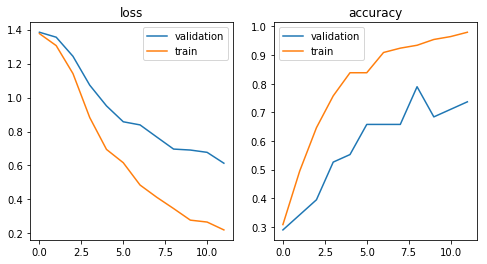

In [17]:
train_loader, test_loader, val_loader,_ = loader()(subject= 3,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 12)

In [19]:
train_loader, test_loader, val_loader,_ = loader()(subject= 4,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 12)

Train data shape:  (196, 22, 1000)
Train labels shape:  (196,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/196 (0%)]	Loss: 1.397490
Train Epoch: 0 [150/196 (71%)]	Loss: 1.387985


KeyboardInterrupt: 

Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/197 (0%)]	Loss: 1.375834
Train Epoch: 0 [150/197 (71%)]	Loss: 1.343477
train loss: 1.3388, Accuracy: 96/197 (49%)
validation loss: 1.3523, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/197 (0%)]	Loss: 1.058502
Train Epoch: 1 [150/197 (71%)]	Loss: 0.960803
train loss: 1.1106, Accuracy: 135/197 (69%)
validation loss: 1.2343, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/197 (0%)]	Loss: 0.819052
Train Epoch: 2 [150/197 (71%)]	Loss: 0.591424
train loss: 0.7786, Accuracy: 161/197 (82%)
validation loss: 1.0495, Accuracy: 18/38 (47%)

Train Epoch: 3 [0/197 (0%)]	Loss: 0.477822
Train Epoch: 3 [150/197 (71%)]	Loss: 0.589729
train loss: 0.6264, Accuracy: 163/197 (83%)
validation loss: 0.9610, Accuracy: 22/38 (58%)

Train Epoch: 4 [0/197 (0%)]	Loss: 0.395297
Train Epoch: 4 [150/197 (71%)]	Loss: 0.41

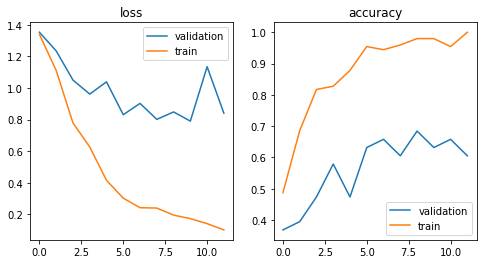

In [26]:
train_loader, test_loader, val_loader,_ = loader()(subject= 5,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0015, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 12)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (49, 22, 1000)
test labels shape:  (49,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.401701
Train Epoch: 0 [150/198 (71%)]	Loss: 1.320182
train loss: 1.2305, Accuracy: 107/198 (54%)
validation loss: 1.2632, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.112973
Train Epoch: 1 [150/198 (71%)]	Loss: 1.139990
train loss: 1.0289, Accuracy: 124/198 (63%)
validation loss: 1.1832, Accuracy: 14/38 (37%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.121603
Train Epoch: 2 [150/198 (71%)]	Loss: 1.046485
train loss: 0.8951, Accuracy: 136/198 (69%)
validation loss: 1.1348, Accuracy: 16/38 (42%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.763890
Train Epoch: 3 [150/198 (71%)]	Loss: 0.788943
train loss: 0.8125, Accuracy: 144/198 (73%)
validation loss: 1.1031, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.665841
Train Epoch: 4 [150/198 (71%)]	Loss: 0.7

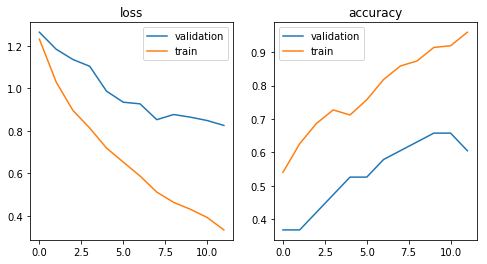

In [18]:
train_loader, test_loader, val_loader,_ = loader()(subject= 6,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 12)

In [34]:
train_loader, test_loader, val_loader,_ = loader()(subject= 7,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 10)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)


KeyboardInterrupt: 

Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/194 (0%)]	Loss: 1.372023
Train Epoch: 0 [150/194 (71%)]	Loss: 1.312136
train loss: 1.1968, Accuracy: 106/194 (55%)
validation loss: 1.3076, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/194 (0%)]	Loss: 1.059393
Train Epoch: 1 [150/194 (71%)]	Loss: 1.131065
train loss: 1.0057, Accuracy: 128/194 (66%)
validation loss: 1.2626, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/194 (0%)]	Loss: 0.908531
Train Epoch: 2 [150/194 (71%)]	Loss: 0.878089
train loss: 0.8390, Accuracy: 140/194 (72%)
validation loss: 1.2008, Accuracy: 18/38 (47%)

Train Epoch: 3 [0/194 (0%)]	Loss: 0.861143
Train Epoch: 3 [150/194 (71%)]	Loss: 0.778713
train loss: 0.7135, Accuracy: 154/194 (79%)
validation loss: 1.1794, Accuracy: 16/38 (42%)

Train Epoch: 4 [0/194 (0%)]	Loss: 0.761252
Train Epoch: 4 [150/194 (71%)]	Loss: 0.7

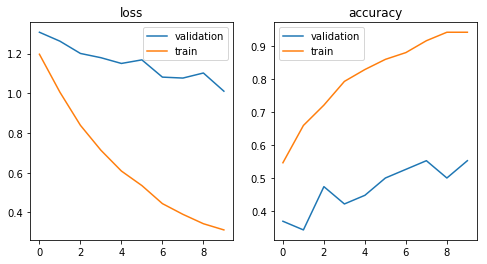

In [20]:
train_loader, test_loader, val_loader,_ = loader()(subject= 8,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 10)

In [ ]:
train_loader, test_loader, val_loader,_ = loader()(subject= 9,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 10)

In [94]:
train_loader, test_loader, val_loader, test_loaders = loader()(subject = "ALL",
                                                            batch_size = 30,
                                                            num_validation = 37)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    break
model = CNN_Shallow()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.01)
main_train(epoches = 10)
for i in range(11):
    print('This is test set result for subject{}:'.format(i+1))
    test(test_loaders[i], mode = 'val')

Train data shape:  (2078, 22, 1000)
Train labels shape:  (2078,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)
--------------------
data size: torch.Size([30, 1, 22, 1000])


RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at /Users/soumith/mc3build/conda-bld/pytorch_1549593514549/work/aten/src/THNN/generic/ClassNLLCriterion.c:93